In [113]:
import cv2
import os

In [114]:
dir_path = "/content/drive/MyDrive/Deep_Learning/brain_tumor_dataset"

In [115]:
categories = os.listdir(dir_path)
categories

['no', 'yes']

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
labels = [i for i in range(len(categories))]
labels

[0, 1]

In [118]:
# label_dict = dict(zip(categories,labels))

In [119]:
img_size = 100
x = []
y = []

for category,label in zip(categories,labels):
  folder_path = os.path.join(dir_path,category)
  img_names = os.listdir(folder_path)

  for img_name in img_names:
    img_path = os.path.join(folder_path,img_name)
    img = cv2.imread(img_path)
    try:
      gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      resized_img = cv2.resize(gray,(img_size,img_size))
      x.append(resized_img)
      y.append(label)

    except Exception as e:
      print("Exception",e)

      cv2.imwrite(img_path,img)


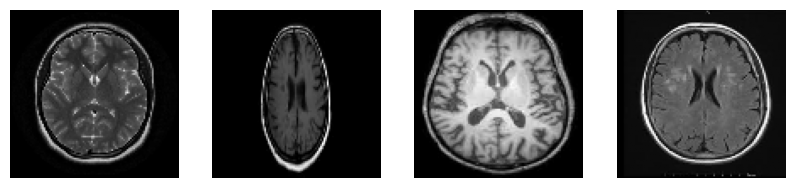

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(x[i], cmap="gray")
  plt.axis("off")
plt.show()

In [121]:
import numpy as np
x = np.array(x)/255.0
x = np.reshape(x,(x.shape[0],img_size,img_size,1))
y = np.array(y)
x.shape

(253, 100, 100, 1)

In [122]:
# from tensorflow.keras.utils import to_categorical
# new_target = to_categorical(target)
# new_target

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [124]:
x_test.shape

(51, 100, 100, 1)

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
# ModelCheckpoint==>for best model
# Dropout==>for avoiding overfitting

model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation="relu"))
model.add(Dense(2,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [127]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.5408 - loss: 0.7123 - val_accuracy: 0.7843 - val_loss: 0.5100
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.7295 - loss: 0.5601 - val_accuracy: 0.7843 - val_loss: 0.4889
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7553 - loss: 0.5230 - val_accuracy: 0.7843 - val_loss: 0.4548
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7866 - loss: 0.4864 - val_accuracy: 0.7843 - val_loss: 0.4719
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8006 - loss: 0.4858 - val_accuracy: 0.8235 - val_loss: 0.4742
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.8275 - loss: 0.4042 - val_accuracy: 0.8039 - val_loss: 0.4812
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8651 - loss: 0.3444 - val_accuracy: 0.8431 - val_loss: 0.3977
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8896 - loss: 0.3210 - val_accuracy: 0.8039 - val_loss: 0.4401
Epoch 9/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


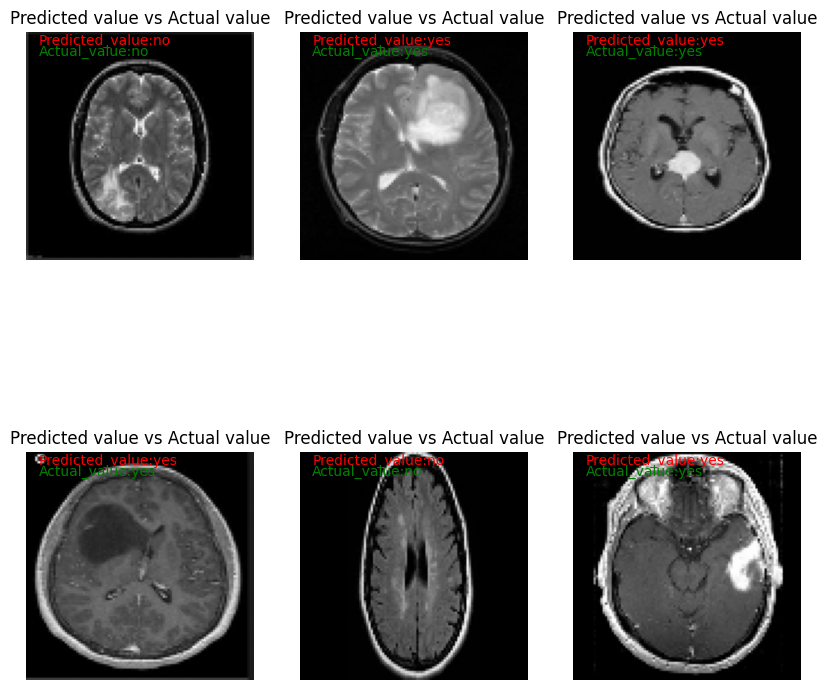

In [146]:
# x_test.shape
plt.figure(figsize=(10,10))
for i in range(0,6):
  plt.subplot(2,3,i+1)
  y_predicted = model.predict(x_test[i].reshape(1,100,100,1))
  # Providing x, y coordinates for text placement
  plt.text(5, 5, f"Predicted_value:{categories[y_predicted.argmax()]}", color='red') # Adjust x, y as needed
  plt.text(5, 10, f"Actual_value:{categories[y_test[i]]}", color='green') # Adjust x, y as needed
  plt.title("Predicted value vs Actual value")
  plt.imshow(x_test[i],cmap="gray")
  plt.axis('off')
plt.show()

In [144]:
# Visualisation
eval=model.evaluate(x_test,y_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 743ms/step - accuracy: 0.9138 - loss: 0.2973


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


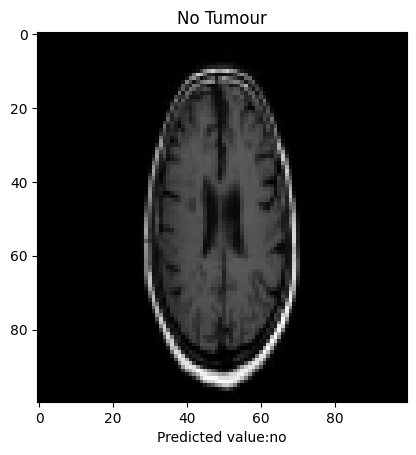

In [145]:
#Prediction from external source
from  skimage.transform import resize
from skimage.io import imread

img=imread("/content/drive/MyDrive/Deep_Learning/brain_tumor_dataset/no/11 no.jpg")
img.shape
img_resize=resize(img,(100,100,1))
img_resize.shape
img_reshape=img_resize.reshape(1,100,100,1)
img_reshape.shape
prediction=model.predict(img_reshape)
categories[prediction.argmax()]
plt.imshow(img_resize,cmap="gray")
if prediction.argmax()==0:
  plt.title("No Tumour")
  plt.xlabel(f"Predicted value:{categories[prediction.argmax()]}")

else:
  plt.title("Tumour Affected")
  plt.xlabel(f"Predicted value:{categories[prediction.argmax()]}")
